<a href="https://colab.research.google.com/github/anitharahul01/anitha/blob/main/intermediat%20asssesment%20anitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Data types:
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latit

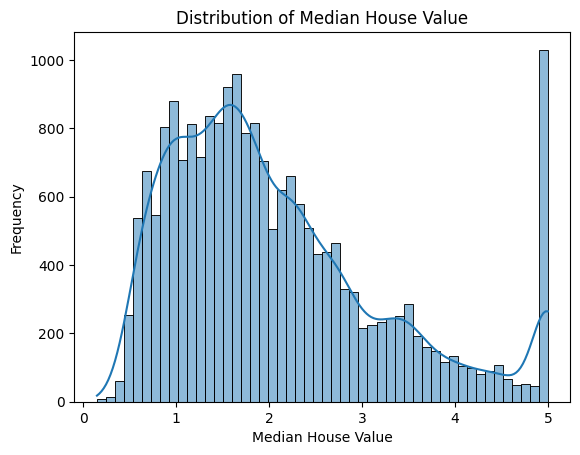

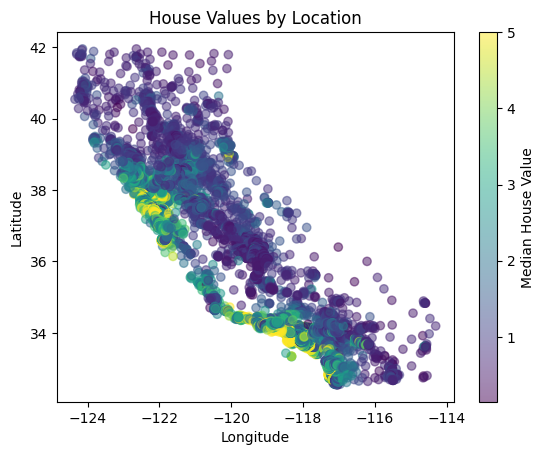

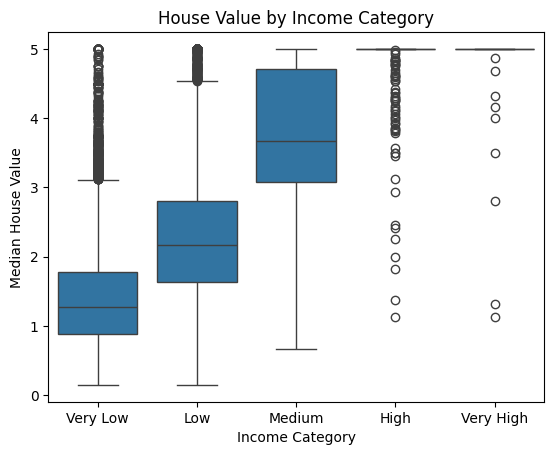

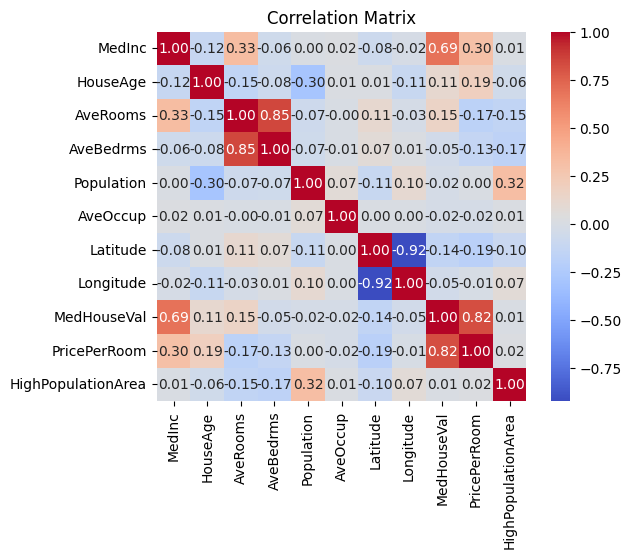

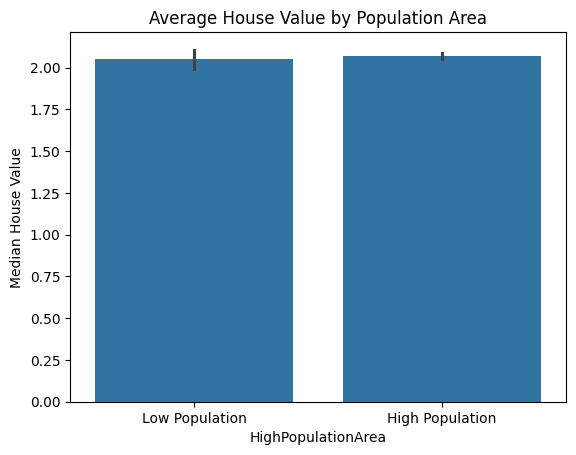

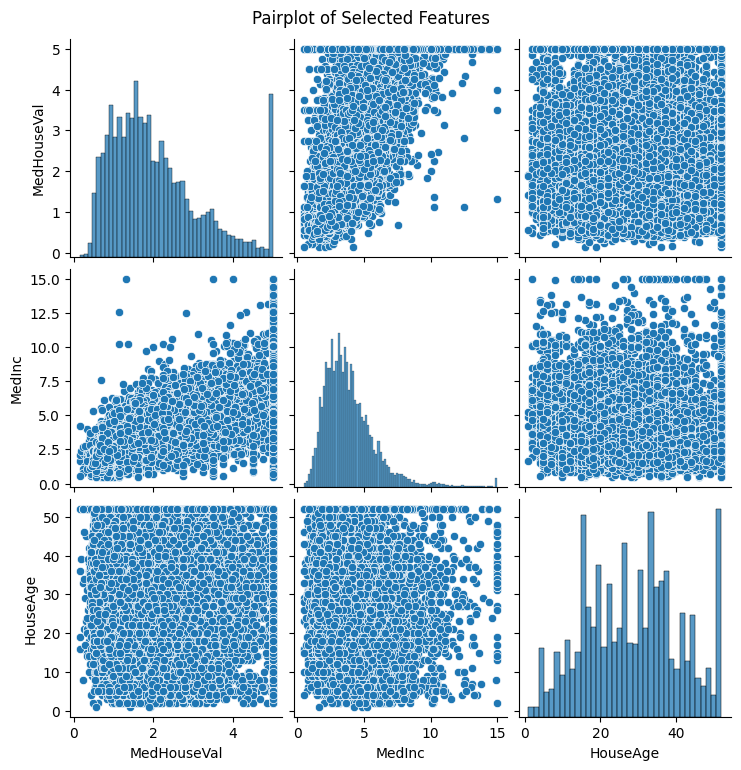

In [18]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset directly from scikit-learn
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# 2. Display the first 5 rows
print("First 5 rows:\n", df.head())

# 3. Column names and data types
print("\nData types:\n", df.dtypes)

# 4. Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 5. Basic statistical summary
print("Statistical Summary:", df.describe())

#6. Check for and remove any duplicated rows
df = df.drop_duplicates()

# 7. Fill missing values with the mean
df = df.fillna(df.mean(numeric_only=True))

# 8. insert New column PricePerRoom
df['PricePerRoom'] = df['MedHouseVal'] / df['AveRooms']

# 9. New column: HighPopulationArea (1 if population > 500 else 0)
df['HighPopulationArea'] = (df['Population'] > 500).astype(int)

# 10 Bin the median_income into 5 equal-sized bins and label them as Very Low, Low, Medium,
#High, Very High. (Hint: pd.cut)
df['IncomeCategory'] = pd.cut(
    df['MedInc'],
    bins=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)


# 11. Drop columns that seem redundant after feature creation
df_cleaned = df.drop(['MedInc', 'AveRooms'], axis=1)

print("Cleaned DataFrame sample:", df_cleaned.head())


#12. Plot the distribution of median_house_value with a histogram

sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

#13 Create a scatter plot of longitude vs latitude, colored by median_house_value.

scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Median House Value')
plt.title("House Values by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#14 14. Plot a boxplot of median_house_value grouped by the new income categories
sns.boxplot(x='IncomeCategory', y='MedHouseVal', data=df)
plt.title("House Value by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Median House Value")
plt.show()

#15 Plot the correlation matrix heatmap between numerical features
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()
#16  Create a bar plot showing average median_house_value for high population vs low
#population areas
sns.barplot(x='HighPopulationArea', y='MedHouseVal', data=df)
plt.xticks([0, 1], ['Low Population', 'High Population'])
plt.title("Average House Value by Population Area")
plt.ylabel("Median House Value")
plt.show()
# Pairplot of selected features
sns.pairplot(df[['MedHouseVal', 'MedInc', 'HouseAge']])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

